In [1]:
# THIS NOTEBOOK TRAINS THE CNN AUTOENCODER WITH THE 32by23 RESOLUTION DATASET

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
from data_loader import DataLoader
from utils.visualize import show_images_in_grid, show_reconstruction, show_reconstructions
from cnn import Autoencoder
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abhi/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/abhi/anaconda3

In [4]:
root = os.getcwd()

In [5]:
cnn_data_loader = DataLoader()

In [6]:
cnn_data_loader.X_train = np.reshape(np.load(root+"/../datasets/train/32/X_train_normalized.npy"), (-1, 32, 32, 3))
cnn_data_loader.Y_train = np.reshape(np.load(root+"/../datasets/train/32/Y_train_normalized.npy"), (-1, 32, 32, 3))
cnn_data_loader.X_val = np.reshape(np.load(root+"/../datasets/val/32/X_val_normalized.npy"), (-1, 32, 32, 3))
cnn_data_loader.Y_val = np.reshape(np.load(root+"/../datasets/val/32/Y_val_normalized.npy"), (-1, 32, 32, 3))
cnn_data_loader.X_test = np.reshape(np.load(root+"/../datasets/test/32/X_test_normalized.npy"), (-1, 32, 32, 3))
cnn_data_loader.Y_test = np.reshape(np.load(root+"/../datasets/test/32/Y_test_normalized.npy"), (-1, 32, 32, 3))

In [7]:
cnn_data_loader.X_train.shape, cnn_data_loader.X_val.shape, cnn_data_loader.X_test.shape

((16000, 32, 32, 3), (2000, 32, 32, 3), (2000, 32, 32, 3))

In [8]:
ae = Autoencoder()
ae.build_model(input_dim=(32, 32, 3), latent_dim=(64,))
# ae.set_weights(root+"/../models/autoencoder_32.h5")

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
ae.encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        3136      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          65600     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          65600     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                262208    
Total params: 396,544
Trainable params: 396,544
Non-trainable params: 0
_____________________________________________________

In [10]:
ae.decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 192)               12480     
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 3)           0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 64)        3136      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 32, 32, 64)        65600     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 32, 32, 64)        65600     
_________________________________________________________________
flatten_2 (Flatten)          (None, 65536)             0   

In [12]:
history = {
    "loss" : [],
    "val_loss" : []
} 

EPOCH 0
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 1.3938 - val_loss: 2.5671


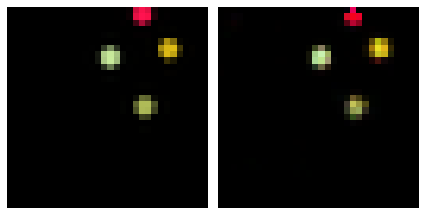

EPOCH 1
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.8929 - val_loss: 1.4752
EPOCH 2
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.7142 - val_loss: 1.0585
EPOCH 3
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.6299 - val_loss: 0.8533
EPOCH 4
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.5776 - val_loss: 0.7327
EPOCH 5
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.5318 - val_loss: 0.6404


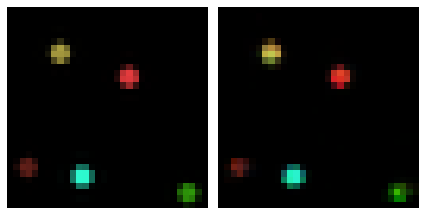

EPOCH 6
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.4929 - val_loss: 0.5677
EPOCH 7
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.4582 - val_loss: 0.5064
EPOCH 8
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.4374 - val_loss: 0.4792
EPOCH 9
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.4095 - val_loss: 0.4504
EPOCH 10
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.3816 - val_loss: 0.3985


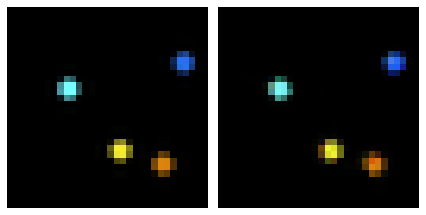

EPOCH 11
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.3656 - val_loss: 0.3698
EPOCH 12
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.3503 - val_loss: 0.3549
EPOCH 13
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.3322 - val_loss: 0.3694
EPOCH 14
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.3183 - val_loss: 0.3138
EPOCH 15
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.3045 - val_loss: 0.2990


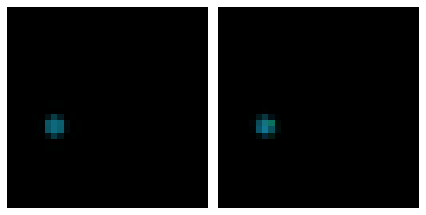

EPOCH 16
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2948 - val_loss: 0.2841
EPOCH 17
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2846 - val_loss: 0.2721
EPOCH 18
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2703 - val_loss: 0.2561
EPOCH 19
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2628 - val_loss: 0.2486
EPOCH 20
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2559 - val_loss: 0.2532


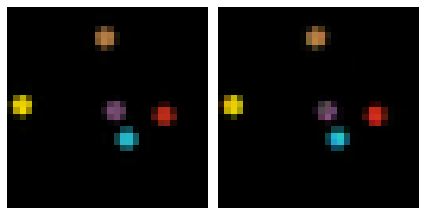

EPOCH 21
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2525 - val_loss: 0.2454
EPOCH 22
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2417 - val_loss: 0.2254
EPOCH 23
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2331 - val_loss: 0.2289
EPOCH 24
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2280 - val_loss: 0.2085
EPOCH 25
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2198 - val_loss: 0.2068


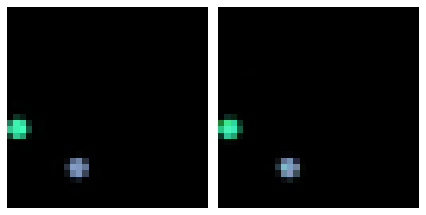

EPOCH 26
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2161 - val_loss: 0.1998
EPOCH 27
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2098 - val_loss: 0.1955
EPOCH 28
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.2035 - val_loss: 0.1907
EPOCH 29
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1993 - val_loss: 0.1839
EPOCH 30
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1966 - val_loss: 0.1828


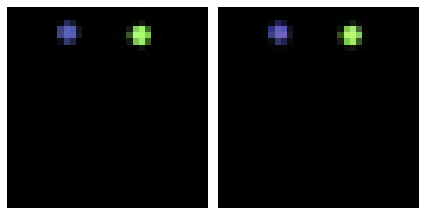

EPOCH 31
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1919 - val_loss: 0.1721
EPOCH 32
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1863 - val_loss: 0.1752
EPOCH 33
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1830 - val_loss: 0.1688
EPOCH 34
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1777 - val_loss: 0.1687
EPOCH 35
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1743 - val_loss: 0.1581


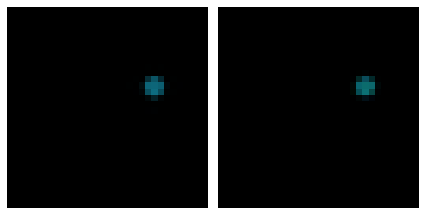

EPOCH 36
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1728 - val_loss: 0.1616
EPOCH 37
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1696 - val_loss: 0.1617
EPOCH 38
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1660 - val_loss: 0.1534
EPOCH 39
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1610 - val_loss: 0.1486
EPOCH 40
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1608 - val_loss: 0.1460


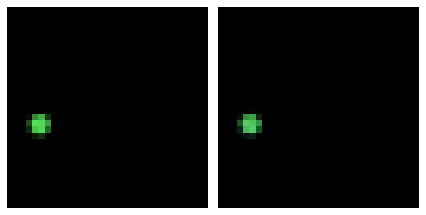

EPOCH 41
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1568 - val_loss: 0.1547
EPOCH 42
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1536 - val_loss: 0.1439
EPOCH 43
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1513 - val_loss: 0.1421
EPOCH 44
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1480 - val_loss: 0.1358
EPOCH 45
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1457 - val_loss: 0.1514


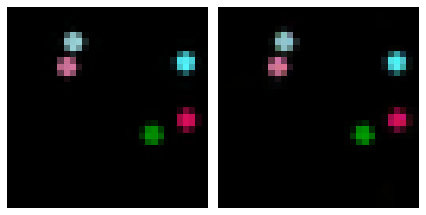

EPOCH 46
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1451 - val_loss: 0.1486
EPOCH 47
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1433 - val_loss: 0.1314
EPOCH 48
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1393 - val_loss: 0.1298
EPOCH 49
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1369 - val_loss: 0.1270
EPOCH 50
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1355 - val_loss: 0.1235


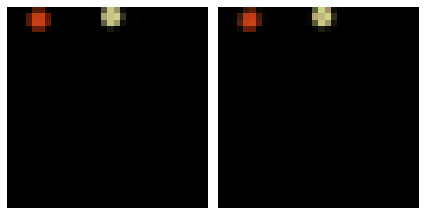

EPOCH 51
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1348 - val_loss: 0.1299
EPOCH 52
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1341 - val_loss: 0.1222
EPOCH 53
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1298 - val_loss: 0.1218
EPOCH 54
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1268 - val_loss: 0.1185
EPOCH 55
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1262 - val_loss: 0.1183


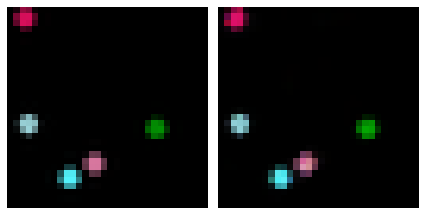

EPOCH 56
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1246 - val_loss: 0.1149
EPOCH 57
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1240 - val_loss: 0.1168
EPOCH 58
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1227 - val_loss: 0.1162
EPOCH 59
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1204 - val_loss: 0.1153
EPOCH 60
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1194 - val_loss: 0.1091


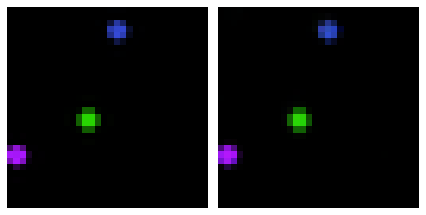

EPOCH 61
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1165 - val_loss: 0.1122
EPOCH 62
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1164 - val_loss: 0.1099
EPOCH 63
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1157 - val_loss: 0.1082
EPOCH 64
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1122 - val_loss: 0.1027
EPOCH 65
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1131 - val_loss: 0.1040


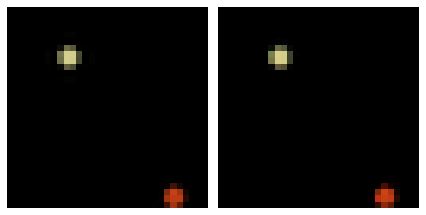

EPOCH 66
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1119 - val_loss: 0.1039
EPOCH 67
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1094 - val_loss: 0.1024
EPOCH 68
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1089 - val_loss: 0.1007
EPOCH 69
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1085 - val_loss: 0.1016
EPOCH 70
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1073 - val_loss: 0.1032


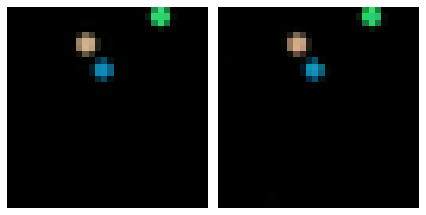

EPOCH 71
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1052 - val_loss: 0.0994
EPOCH 72
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1042 - val_loss: 0.0971
EPOCH 73
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1023 - val_loss: 0.0926
EPOCH 74
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1021 - val_loss: 0.0949
EPOCH 75
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1008 - val_loss: 0.0956


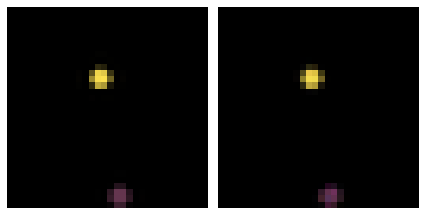

EPOCH 76
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1012 - val_loss: 0.0913
EPOCH 77
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1003 - val_loss: 0.0992
EPOCH 78
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.0994 - val_loss: 0.0897
EPOCH 79
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.0969 - val_loss: 0.0886
EPOCH 80
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
20000/20000 [==============================] - 54s 3ms/step - loss: 0.0957 - val_loss: 0.0891


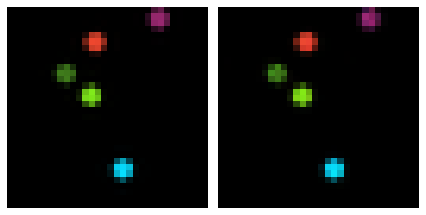

EPOCH 81
Train on 20000 samples, validate on 2000 samples
Epoch 1/1
  192/20000 [..............................] - ETA: 53s - loss: 0.0999

KeyboardInterrupt: 

In [24]:
# TRAIN LOOP
for epoch in range(1000):
    print('EPOCH %d' % (epoch))
    hist  = ae.train(X_train=X_train, 
                     Y_train=X_train, 
                     X_val=cnn_data_loader.X_test, 
                     Y_val=cnn_data_loader.X_test, 
                     epochs=1, 
                     batch_size=32, 
                     shuffle=True)
    history["loss"].append(hist.history["loss"][0])
    history["val_loss"].append(hist.history["val_loss"][0])
    if epoch % 5 == 0:
        i = random.randint(0, cnn_data_loader.X_train.shape[0]-1)
        x = cnn_data_loader.X_train[i:i+1]
        y = ae.autoencoder.predict(x)
        show_reconstruction(x[0], y[0])
    ae.save_weights(root+"/../models/autoencoder_32_v3.h5")

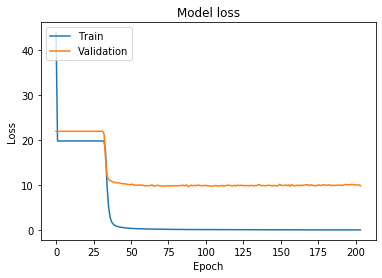

In [14]:
# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
Y_train_hat = ae.autoencoder.predict(cnn_data_loader.X_train)
Y_val_hat = ae.autoencoder.predict(cnn_data_loader.X_val)
Y_test_hat = ae.autoencoder.predict(cnn_data_loader.X_test)

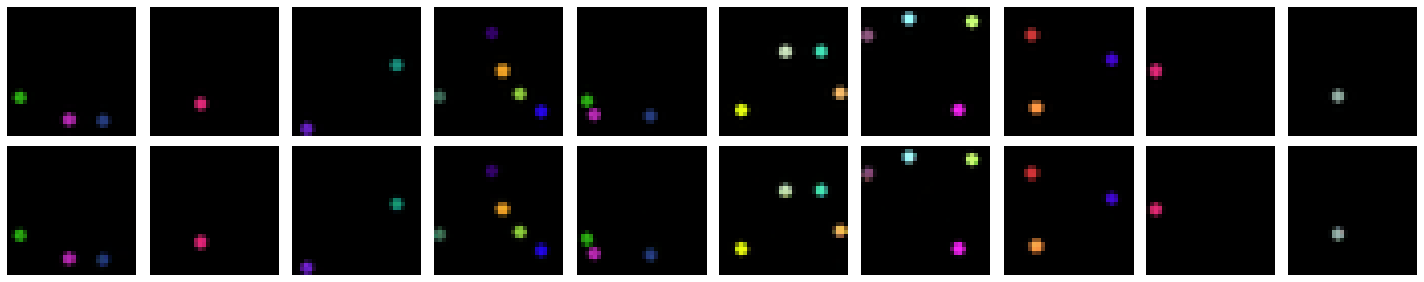

In [31]:
show_reconstructions(cnn_data_loader.Y_test, Y_test_hat, 10, (50,50), (20,4), rescale=True)